<div class="alert alert-block alert-success">
   

## <span style=" color:Purple"> Workshop Konusu </span>
   
Gecen Hafta SUPERVISED learningten Regresyon cesitleri ile calisma yapmistik. Bu hafta meshur bir dataset ile çalışmamıza decision tree metotlarını ekleyeceğiz. Kullandigimiz dataset bircok populer sitelerde kullanildigi icin calismanizi kendinize gore duzenleyerek online platformlarla dogrudan uyumlu yapabileceksiniz.

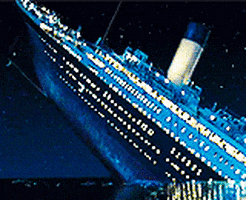
    
## <span style=" color:Purple"> Amacimiz </span>
   
Titanic gemisinden kurtulanlarin bilgileri isiginda data analizi adimlarini takip ederek bir model olusturmak. Bu modeli egitip decision methodlari ile kurtulanlari tespit edebilme basarisini olcecegiz.<p>

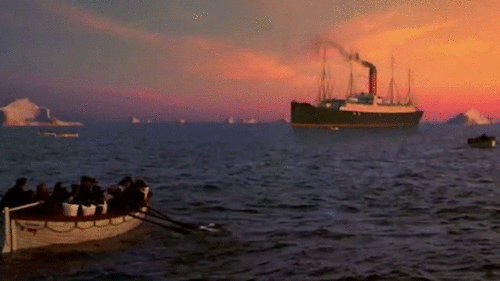
    
    
## <span style=" color:Purple"> Takip Edeceğimiz Çözüm Adımları </span>

<b>Veri Bilimi Çözümleri kitabında açıklanan yedi aşamadan geçer.</b><p>
1-Soru veya problem tanımı.<p>
2-Eğitim ve test verilerini edinme.<p>
3-Tartışma, hazırlama, verileri temizleme.<p>
4-Analiz, paternleri belirleme ve datayı keşfetme .<p>
5-Problemi modelleme, predict etme ve problemi çözme.<p>
6-Problem çözme adımlarını ve nihai çözümü görselleştirme, raporlama ve sunma.<p>
7-Sonuçları supply veya submit etme.<p>

İş akışı, her aşamanın diğerini nasıl takip edebileceğinin genel sırasını gösterir. Bununla birlikte istisna durumlar vardır.<p>

- Birden fazla iş akışı aşamasını birleştirebiliriz. Verileri görselleştirerek analiz edebiliriz.<p>
- Belirtilenden daha önce bir aşama gerçekleştirebiliriz. Tartışmadan önce ve sonra verileri analiz edebiliriz.<p>
- İş akışımızda bir aşamayı birden çok kez gerçekleştirebiliriz. Görselleştirme aşaması birden çok kez kullanılabilir.<p>
- Yapilan modelleri bir araya getirip sonuclari en son sergileyebiliriz.<p>
    

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


<div class="alert alert-block alert-success">
    
## <span style=" color:Purple"> Titanic Dataseti Hakkinda Sutun Bilgileri </span>
survival - Survival (0 = No; 1 = Yes)<p>

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<p>

name - Name<p>

sex - Sex<p>

age - Age<p>

sibsp - Number of Siblings/Spouses Aboard (beraberinde kardeş / eş var mı)<p>

parch - Number of Parents/Children Aboard (beraberinde ebeveyn / çocuk var mı)<p>

ticket - Ticket Number (bilet numarası)<p>

fare - Passenger Fare (ödenen ücret)<p>

cabin - Cabin (kabin numarası)<p>

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) (binilen liman)<p>
    
    
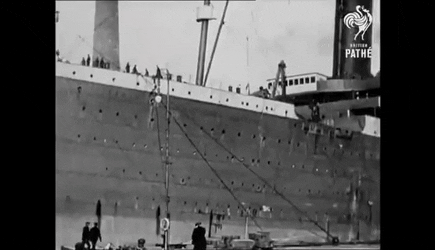 <p>

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
combine = [train_df, test_df]

## <span style=" color:Purple"> Ve data analizi yolculuğuna başlıyoruz </span>
    
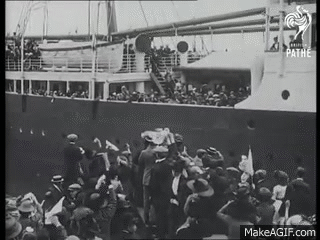

***

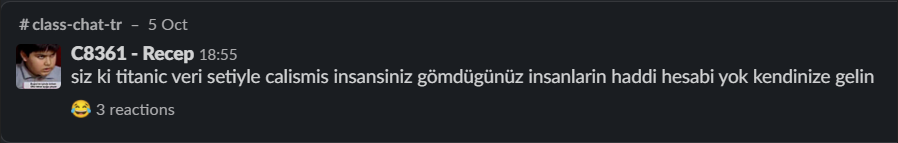

**Aşina olduğumuz bir yolculuğu daha ileri noktalara götüreceğiz.**

***

In [3]:
df = pd.concat([train_df, test_df],axis=0)
df.reset_index(drop=True, inplace=True)

# !! reset_index metodu ile indeksleri 0'dan sıralı olarak artacak şekilde yeniden belirliyorum.

# Dataset Inceleme

In [4]:
print("       Shape")
print('^'*20) 
print()
print ("train  :", train_df.shape)
print('')
print('_'*18)
print('')
print ("test  :",test_df.shape)
print('')
print('+'+'_'*18)
print('')
print ("df:", df.shape)

       Shape
^^^^^^^^^^^^^^^^^^^^

train  : (891, 12)

__________________

test  : (418, 12)

+__________________

df: (1309, 12)


In [5]:
df.shape

(1309, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.duplicated().sum()

# EDA kısmına geçmeden önce tekrar eden aynı satırlarım olup olmadığını kontrol ediyorum. 

0

In [8]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-block alert-info">
    
## <span style=" color:Purple"> Kategorik Featurelarimiz </span>

Bu değerler, sample'ları benzer sample kümeleri halinde sınıflandırır. Bunun yanı sıra, görselleştirme için uygun grafikleri seçmemize yardımcı olur.<p>

<p>Kategorik olanlar : <b>Survived, Sex, and Embarked.</b></p> Ordinal: <b>Pclass.</b>
    
    
## <span style=" color:Purple"> Numerik Featurelarimiz </span>

Sayısal feature'lar içinde değerleri discrete, continuous veya timeseries'e  dayalidir, ve görselleştirme için uygun grafikleri seçmemize yardımcı olurlar.<p>

Continuous Veriler: <b>Age, Fare.</b><p>
    
Discrete Veriler: <b>SibSp, Parch.</b>

In [9]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<div class="alert alert-block alert-info">
    
## <span style=" color:Purple"> İçeriği Karışık Feature'lar </span>
    

"Ticket", sayısal ve alfasayısal veri türlerinin bir karışımıdır. "Cabin" alfanumeriktir.<p>
    
## <span style=" color:Purple"> İçeriği hatalı, yanlış yazılmış Feature'lar </span>

<i>Bunu büyük bir veri kümesi için incelemek daha zordur, ancak daha küçük bir veri kümesinden birkaç örneği incelemek bize hangi feature'ların düzeltilmesi gerekebileceğini doğrudan söyleyebilir.</i><p>
    
 
<b>Name :</b> unvanlar, köşeli parantezler ve alternatif veya kısa adlar için kullanılan tırnak işaretleri dahil olmak üzere bir adı tanımlamanın birkaç yolu olduğundan, hatalar veya yazım hataları içerebilir.

In [10]:
train_df.info()
print('_'*40)
print('')
test_df.info()

# Age ve Cabin feature larımda null değerler var. train datamın Embarked feature'unda 2 adet null değer var.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

<div class="alert alert-block alert-info">
    
## <span style=" color:Purple"> Icerigi Olmayan Featurelar (blank, null or empty) </span>

<b>Kayip verilerin duzenlenmesi gerekebilir. Bizim icin kiymetli bilgileri en anlamli sekilde tamamlayip modelimize katkida saglayabilir miyiz diye bakmaliyiz.</b><p>

Training'te:  Cabin > Age > Embarked,  bu sırayla bir dizi boş değer içerir.<p>
Test' te___:  Cabin > Age, bu sırayla bir dizi boş değer içerir.<p>
    
<b><i>Yorum</i></b>: Bunlardan Cabin feature'unda sadece 31 value var ve geri kalanı missing olup classification işlemi için işimize yaramayacağından bu feature düşürülmelidir. 
    
    
## <span style=" color:Purple"> Feature Türleri  </span>
 
<b> Machine learning modelimizi kurmada kullanacagimiz verilerin turlerini inceleyip gerekli duzenlemeleri yapmaliyiz</b><p>


--Yedi feature tamsayı veya değişkendir (integer or floats).<p>
--Beş feature string'tir (nesne/object).<p>

In [11]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div class="alert alert-block alert-info">
    
## <span style=" color:Purple"> Sayısal Bilgiler Isiginda Numerik Degerlerimizin Istatistiksel Dagilimlari  </span>
 
<p><i><b>Bu bilgiler erken cikarimlarin yanı sıra, gerçek sorunu tanimlarken eğitim veri kümesinin ne kadar representiv olduğunu belirlememize yardımcı olur.</b></i></p> </div>

<div class="alert alert-block alert-warning">
<i>**Biraz Domain Bilgisi ile harmanlayip konuya hakimiyetimizi arttirmak istiyoruz**</i><p>

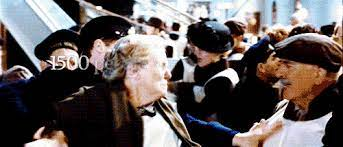 
<b>109 yil onceki tarihi olay bugun arastirmacilar icin egitim amacli genis yer bulan bir dataset calismasi olmustur.</b>
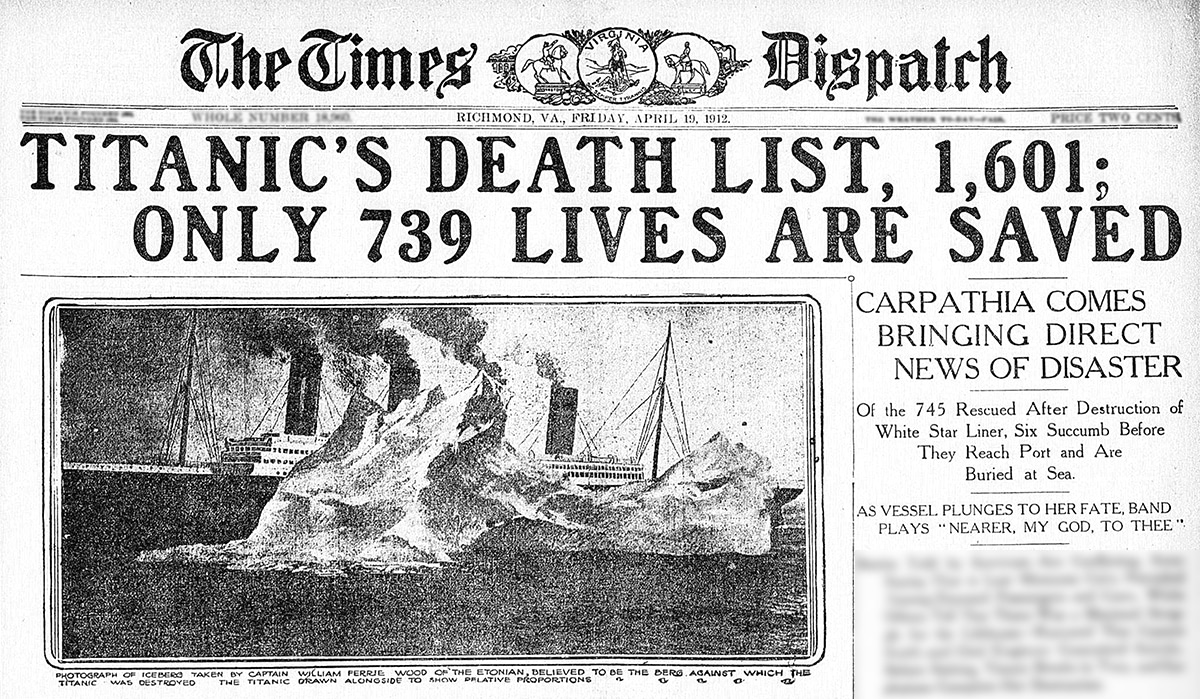<p>
</div>
    
<div class="alert alert-block alert-info">
    
1- Toplam (training) sample (891), Titanik'teki gerçek yolcu sayısının (2.224) %40'ıdır.<p>
2- Survived, 0 veya 1 değerleri olan kategorik bir özelliktir.<p>
3- Datasetimizde yaklaşık %38 lik kurtulma oranıyla "Survived" feature'ı, %32'lik gerçek hayatta kalma oranını temsil edecek.<p>
4- Yolcuların çoğu (> %75) ebeveynleri veya çocukları ile seyahat etmemiştir. (Parch feature'ı)<p>
5- Yolcuların yaklaşık %30'unun gemide kardeşleri ve/veya eşleri vardı.(Sibsp feature'ı) <p>
6- Az sayıda yolcu (<%1) 512 $ kadar yüksek ödeme yapmış olup Fares önemli ölçüde değişkenlik gosteriyor.<p>
7- 65-80 yaş aralığında az sayıda yaşlı yolcu (<%1) var. <p>
</div>

In [12]:
#Tum datasetteki unique deger bilgileri

for column in df.select_dtypes('object').columns:
    print(f'Column {column} has {df[column].nunique()} unique values.')

Column Name has 1307 unique values.
Column Sex has 2 unique values.
Column Ticket has 929 unique values.
Column Cabin has 186 unique values.
Column Embarked has 3 unique values.


In [13]:
#Training'teki object type feature'ların unique deger bilgileri

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Duane, Mr. Frank",male,1601,G6,S
freq,1,577,7,4,644


<div class="alert alert-block alert-info">
    
## <span style=" color:Purple"> Kategorik degerlerimizin Istatistiksel Dagilimlari </span>

1. Train datasetteki tüm isimler unique (count=unique=891).<p>
2. Sex --> en sık tekrar eden değer %65 i erkek (top=male, freq=577/count=891).<p>
3. Cabin değerleri, numuneler arasında birkaç duplicate'e sahiptir. Alternatif olarak, birkaç yolcu bir kabini paylasmis olabilir. Ustelik 77.5% oranında missing value var.<p>
4. Embarked üç olası değer alıyor. Çoğu (644) yolcu Southampton Limanı'ndan binmiş. <p>
5. Bilet özelliği yüksek oranda (%22) mükerrer (duplicate) değerlere (unique=681) sahiptir.

<div class="alert alert-block alert-success">
    
## Yukarıda eğitim amaçlı adım adım analiz yaptık.<p>
## Sizler kendi basiniza tek seferde hızlı analiz yapabilmeniz için aşağıda tanimladigimiz quick report fonksiyonu ile tum istatistikleri önünüze getirebilirsiniz. Size yukaridaki yaptiklarimizi tek seferde yapabileceginiz bu fonksiyonla da olabilecegini gostermek istedik.

In [14]:
# Created custom query for a repetitive task
def quick_report(Column):
    percentage = "{:.2%}".format(df[Column].isna().sum()/len(df[Column]))
    print("per_of_nulls   :",percentage)
    
    nulls=df[Column].isna().sum()
    print("num_of_nulls   :",nulls)
    
    uniqueValues = df[Column].nunique()
    print("num_of_uniques :",uniqueValues,"/", len(df[Column]))
    print("")
    
    items=df[Column].value_counts(dropna = False).head(10)
    print(items)
    print("")
    
    # ** Kategorik verileri ayri incelemek isterseniz asagidaki if condition ile filtreleme yapabilirsiniz
    #Boylece sadece numerik veriler gelir
    #
    #if df[Column].dtype != object:
    #    print(df[Column].describe())
    
    print(df[Column].describe()) # NOT: yukaridaki if satirlarini acarsaniz bu satiri silmeniz gerekir.
    print("")

<div class="alert alert-block alert-warning">
EDA kapsamında feature ların incelenmesi ve analizinde işimizi kolaylaştırmak ve bir kaç adımı tek seferde yapmak maksadıyla aşağıdaki "quick_report" fonksiyonunu tanımladık. Bu sayede tek seferde;<p></p><p><b>missing value'larını,</b></p><p><b>bunların yüzdelerini,</b></p><p><b>unique değerlerin miktarlarını,</b></p><p><b>unique değerlerin tekrar sayılarını,</b></p><p><b>ve (**nümerik[istege bagli]) featureların describe bilgilerini</b></p><p>rapor olarak bir arada inceleme fırsatı bulduk.</p>

In [113]:
for col in df.columns:
    print("*"*90)
    print(col)
    quick_report(col)

******************************************************************************************
PassengerId
per_of_nulls   : 0.00%
num_of_nulls   : 0
num_of_uniques : 1309 / 1309

1      1
861    1
879    1
878    1
877    1
876    1
875    1
874    1
873    1
872    1
Name: PassengerId, dtype: int64

count   1309.000
mean     655.000
std      378.020
min        1.000
25%      328.000
50%      655.000
75%      982.000
max     1309.000
Name: PassengerId, dtype: float64

******************************************************************************************
Survived
per_of_nulls   : 0.00%
num_of_nulls   : 0
num_of_uniques : 2 / 1309

0    815
1    494
Name: Survived, dtype: int64

count   1309.000
mean       0.377
std        0.485
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        1.000
Name: Survived, dtype: float64

******************************************************************************************
Pclass
per_of_nulls   : 0.00%
num_of_nulls   : 0
num_of

 ---

<div class="alert alert-block alert-danger">

***Buraya kadar yaptigimiz arastirma ile konu hakkinda biraz yorum ve varsayim yapacak noktaya geldik***
    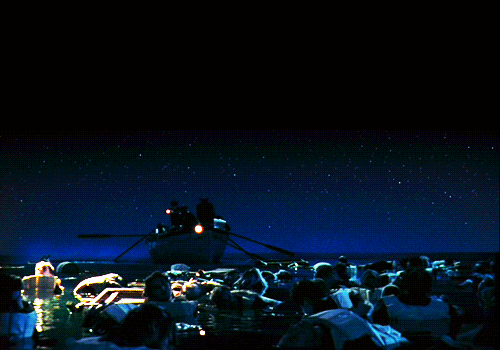 <p>

<div class="alert alert-block alert-warning">
    
# <span style=" color:Purple"> Data Analizimiz Uzerine <span style=" color:Red">"Varsayimlarimiz" </span> </span>

- Su ana kadar yaptiklarimizla asagidaki varsayimlara ulasabiliriz. <b> Ileri ki adimlara gecmeden once bunlarin dogrulamasini yapmamiz gerekiyor.</b><p>
    

# <span style=" color:Purple"> Correlating (Feature Correlasyonlari) </span>

1. Her feature'ın  Survived ile ne kadar iyi ilişkili olduğunu bilmek istiyoruz. Bunu projemizin başlarında yapmak ve bu hızlı korelasyonları projede daha sonra modellenen korelasyonlarla eşleştirmek istiyoruz.<p>
    
    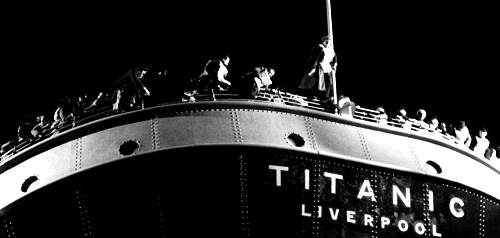
    

# <span style=" color:Purple"> Completing (Missing value tamamlama (imputation)) </span>

1. Age feature'unu kesinlikle Survived ile ilişkili olduğu için tamamlamak isteyebiliriz.<p>
2. Survived feature'u veya başka bir önemli feature ile ilişkili olabileceğinden, Embarked özelliğini tamamlamak isteyebiliriz.<p>

# <span style=" color:Purple"> Correcting (Düzeltmeler, çıkartmalar) </span>

1.  Ticket feature'u, yüksek duplicate oranı (%22) içerdiğinden ve Ticket ile Survived arasında bir ilişki olmayabileceğinden analizimizden çıkarılabilir.<p>
2. Cabin feature'u, oldukça eksik olduğu veya hem eğitim hem de test veri setinde çok sayıda null değer içerdiği için düşürülebilir.<p>
3. "PassengerId", Survived'a katkıda bulunmadığı için train veri kümesinden çıkarılabilir.<p>
4. "Name" feature'u unique'tir, Survived'a katkıda bulunmayacağından düşürülebilir.<p>
    
    
# <span style=" color:Purple"> Creating (Feature Engineering) </span>


1. Gemideki toplam aile üyesi sayısını almak için "Parch" ve "SibSp" featurelari ile Family adlı yeni bir özellik oluşturmak isteyebiliriz.
2. "Name" feature'unu "Title" olarak yeni bir feature çıkarmak için tasarlamak isteyebiliriz.
3. "Age" grupları için yeni bir feature oluşturmak isteyebiliriz. Bu, continuous (sürekli) bir sayısal özelliği ordinal (sıralı) bir kategorik özelliğe dönüştürür.
4. Analizimize yardımcı olacaksa, bir "Fare" aralığı özelliği de oluşturmak isteyebiliriz. 
 
   
# <span style=" color:Purple"> Classifying (Siniflandirma) </span>.
<i>Ayrıca, daha önce belirtilen problem tanımına dayanarak varsayımlarımıza eklemeler yapabiliriz. <b>Asagidaki hipotezlerimizi dogrulamamiz gerekir.<b></i>

1. H0=Kadınların hayatta kalma olasılığı daha yüksek midir?.
2. H0=Belli bir yaş altındaki çocukların hayatta kalma olasılığı daha yüksek midir?
3. H0=Üst sınıf yolcuların (Pclass=1) hayatta kalma olasılığı daha yüksek midir?.
    
    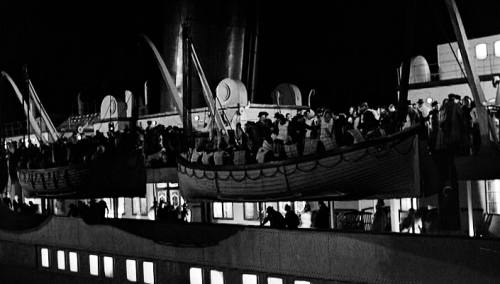


# Featurelari Karsilastirma

In [16]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<div class="alert alert-block alert-info">
    
# <span style=" color:Purple"> Featurelarin Birbiri ile Karsilastirma Sonuclari Uzerine </span>

1. Bazı gözlemlerimizi ve varsayımlarımızı doğrulamak için, featurelari birbiri ile karsilastirarak feature bağıntılarımızı hızlı bir şekilde analiz edebiliriz. Bu aşamada ancak boş değeri olmayan özellikler için bunu yapabiliriz.
2. Ayrıca bunu yalnızca kategorik (Sex), ordinal (Pclass) veya discrete (SibSp, Parch) türdeki özellikler için yapmak mantıklıdır.
    
- Psınıfı Pclass=1 ve Survived (3. sınıflandırma) arasında önemli bir korelasyon (>0.5) gözlemliyoruz. Bu özelliği modelimize dahil etmeye karar verdik.
- Sex=female'in %74 ile çok yüksek bir hayatta kalma oranına (Survived) sahip olduğunu görüyoruz.
- SibSp ve Parch Bu özelliklerin belirli değerler için sıfır korelasyonu vardır. Bu bireysel özelliklerden bir özellik veya bir dizi özellik türetmek en iyisi olabilir.



# Featurelari Gorsellestirme

<div class="alert alert-block alert-info">
    
# <span style=" color:Purple"> Featurelarin Gorsel Analizi </span>


Numerik feature'lar ile çözüm hedefimiz (Survived) arasındaki korelasyonları anlamaya çalışalım.<p>

>Bir histogram grafiği, bantların veya aralıkların yararlı kalıpları tanımlamaya yardımcı olacağı Age gibi continuous sayısal değişkenleri analiz etmek için yararlıdır. Histogram, otomatik olarak tanımlanmış bins veya eşit aralıklı bantlar kullanılarak örneklerin dağılımını gösterebilir. Bu, belirli gruplarla ilgili soruları yanıtlamamıza yardımcı olur<p>

Titanic icin sorulabilecek bir soru (Bebeklerin hayatta kalma oranı yetiskinlere oranla daha mı iyiydi? 

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


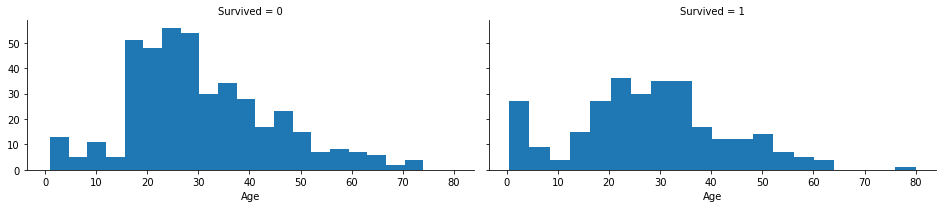

In [20]:
g = sns.FacetGrid(train_df, col='Survived', size=3, aspect=2.2)
g.map(plt.hist, 'Age', bins=20)

<div class="alert alert-block alert-info">
    
<b><i>Gozlemlerimiz</i></b>

- Bebekler (Yaş <=4) yüksek hayatta kalma oranına sahipti.
- En yaşlı yolcular (Yaş = 80) hayatta kaldı.
- 15-25 yaşındaki çok sayıda çocuk hayatta kalamadı.
- Yolcuların çoğu 15-35 yaş aralığında.<p>

    
    
<b><i>Kararlarimiz</i></b>

Bu basit analiz, sonraki iş akışı aşamaları için kararlar olarak varsayımlarımızı doğrular.

1. Model eğitimimizde Age'i (our assumption classsifying #2) dikkate almalıyız.
2. Age feature'unun null değerlerini tamamlamalıyız (completing #1).
3. Yaş gruplarını bantlamalıyız (creating #3).

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


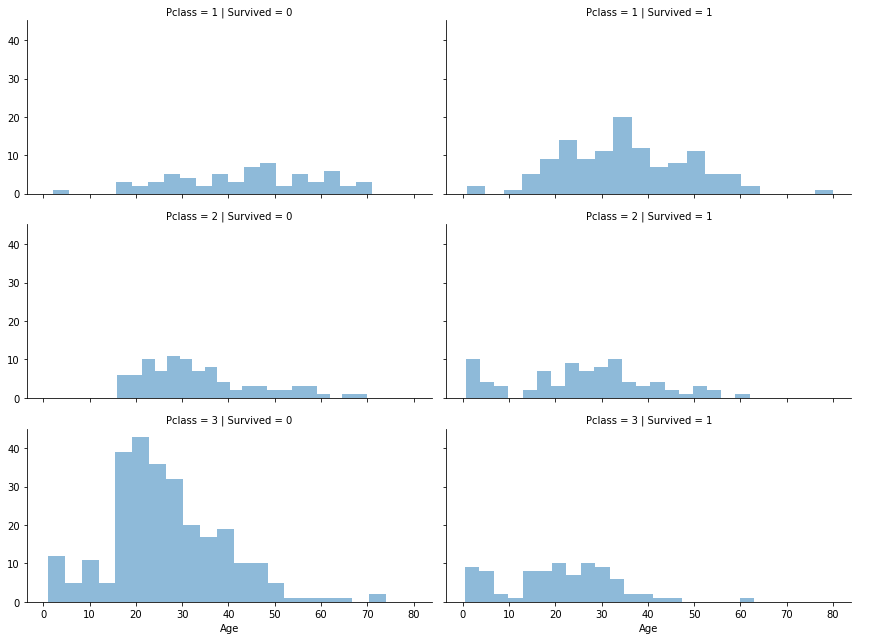

In [21]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<div class="alert alert-block alert-info">
    
<b><i>Numerik ve ordinal özellikleri ilişkilendirme</i></b>

Tek bir çizim kullanarak korelasyonları tanımlamak için birden fazla feature'u birleştirebiliriz. Bu, sayısal değerlere sahip sayısal ve kategorik özelliklerle yapılabilir.

<b><i>Gozlemlerimiz</i></b>

- En cok yolcu Pclass=3'te vardı, ancak çoğu hayatta kalamadı.
- Pclass=2 ve Pclass=3'teki bebek yolcular çoğunlukla hayatta kaldı. 2. Sınıflandırma varsayımımızida onayliyor/destekliyor.
- Pclass=1'deki çoğu yolcu hayatta kaldı. 3 numaralı sınıflandırma varsayımımızı doğrular. 
    
<b><i>Kararlarimiz</i></b>.

Pclass, yolcuların Yaş dağılımına bagimli bir degisim vardir.

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


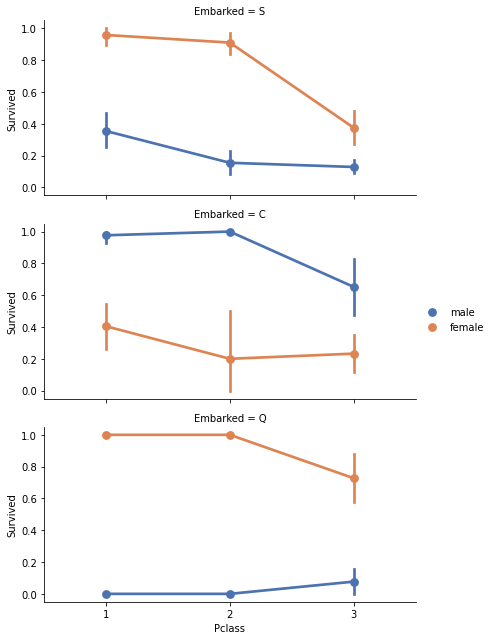

In [22]:
# grid = sns.FacetGrid(train_df, col='Embarked')

grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# x ekseni --> class numarası
# y ekseni --> survived durumu olacak şekilde,
# Embarked-binilen limanlara göre;
# female-male renklendirilmiş line olarak görüyoruz. 

<div class="alert alert-block alert-info">
    
<b><i>Kategorik verilerin Korelasyonu </i></b> <p>
    
Artık kategorik özellikleri çözüm hedefimiz ile ilişkilendirebiliriz.
    
<b><i>Gozlemlerimiz</i></b>
    
- Kadın yolcular erkeklerden çok daha iyi hayatta kalma oranına sahipti. 1.Sınıflandırma varsayımımızı onaylar. (Confirms classifying (#1))
- Erkeklerin daha yüksek hayatta kalma oranına sahip olduğu Embarked=C limanında istisnai bir durum var. Bu, Pclass ile Embarked ve sırayla Pclass ile -Survived arasında bir korelasyon olabilecegini gosteriyor, Embarked ile Survived arasında doğrudan bir korelasyon olmayabilir.
- Q limanından binen Erkeklerin Class'3'te olanları class2'de olanlarına göre daha yüksek oranda kurtulurken, bunun aksine C limanından binen erkeklerin Class2 olanları class3'e göre daha şanslı olduğunu görebiliyoruz. (Completing (#2).)
- Class 3  ve erkek yolcular için Biniş limanları çok farklı Survived oranlarına sahiptir. (Correlating (#1).)
    
<b><i>Kararlarimiz</i></b>.
    Bizim için önemli olan feature'lardan:
- Model eğitimi icin cinsiyet(sex) featurunu nümerik veriye dönüştüreceğiz.
- Model eğitimi icin Embarked featureunu tamamlayip, nümerik veriye çevireceğiz. 

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


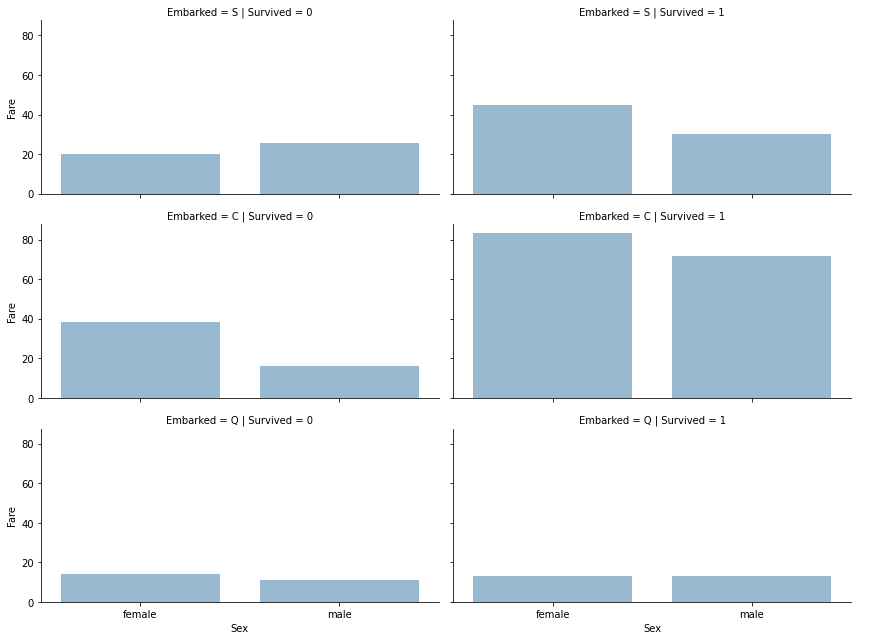

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=3, aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<div class="alert alert-block alert-info">
    
<b><i>Kategorik ve numerik verilerin Korelasyonu </i></b> <p>

kategorik featurelar ve numerik feature ların corelasyonlarını görmek istiyoruz. Embarked (Sayısal olmayan kategori), Cinsiyet (Sayısal olmayan kategori), Ücret (Sayısal continuous), Survived (Kategorik sayısal) ile ilişkilendirmeyi düşünebiliriz.
    
<b><i>Gözlemlerimiz ve Kararlarımız</i></b>
    
- Daha yüksek ücret ödeyen yolcuların yuksek oranda hayatta kaldığının gördük. bu nedenle "Fare"(ucret) aralıkları oluşturarak bunu yeni bir feature olarak tanımalamaya karar verdik.
- Biniş limanı(Embarked), Survived oranları ile ilişkilidir. Bu Correlation (#1) ve missing value tamamlama varsayimimizi doğrulamaktadır.

# Wrangle data

Veri kümelerimiz ve çözüm gereksinimlerimizle ilgili birkaç varsayım ve karar topladık. Bunlara ulaşmak için şimdiye kadar tek bir feature veya value değiştirmemiz gerekmedi. Şimdi modelimiz icin hedefleri düzeltmek, oluşturmak ve verileri tamamlamak için kararlarımızı ve varsayımlarımızı uygulamaya geciyoruz.

### Drop Features

Bu, featurelari elemek iyi bir başlangıçtir. Not defterimizi hızlandırır ve analizi kolaylaştırır.

Daha öcne belirledigimiz Cabin ve Ticket featurelarimizi dusurmekle basliyoruz.

<div class="alert alert-block alert-danger">

Tum islemleri training ve test datasetine uygulandigimizdan emin olmaliyiz.

In [24]:
df.shape

(1309, 12)

##### Featurelar dusuruldukten sonraki datasetimizin boyutlari

In [15]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 12) (891, 12) (418, 12)


('After', (891, 10), (418, 10), (891, 10), (418, 10))

In [19]:
df.Name.sample(10)

1221    Davies, Mrs. John Morgan (Elizabeth Agnes Mary...
346                             Smith, Miss. Marion Elsie
961                             Mulvihill, Miss. Bertha E
706                         Kelly, Mrs. Florence "Fannie"
867                  Roebling, Mr. Washington Augustus II
1297                            Ware, Mr. William Jeffery
760                                    Garfirth, Mr. John
988                             Makinen, Mr. Kalle Edvard
306                               Fleming, Miss. Margaret
682                           Olsvigen, Mr. Thor Anderson
Name: Name, dtype: object

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


##### Titlelari kullanarak yeni bir feature olusturmaya calisiyoruz.

##### Tekrar sikliklarina gore 4 sinif belirgin miktarda var ve geri kalanlarida "Rare" grubu altinda topluyoruz.

In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')   # geri kalanların tamamına Rare dedik.

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')   # düzeltme yaptık
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

# 1,2,3,4,5 değerlerinden oluşan Title feature u oluşturduk.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


##### Datasetimizin "Title" kolonunun dummies yapilmis hali

##### Artik bir islevi kalmayan 'Name', 'PassengerId' kolonlarinida drop ediyoruz.

In [30]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name','PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

##### Cinsiyet kolonunuda modelimiz icin numerik veriye cevirdik.

In [31]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Age featureumuzun doldurulmasi

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


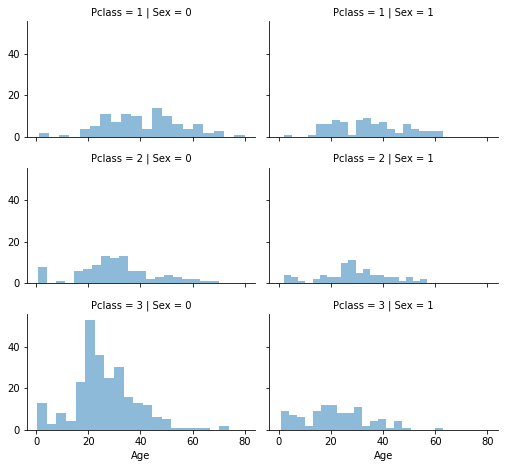

In [32]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### Nümerik bir continuous özelliği tamamlamak için üç yöntem düşünebiliriz.

1. metod: Basit yol, ortalama ve standart sapma arasında rastgele sayılar üretmektir.

2. metod:  Eksik değerleri tahmin etmenin daha doğru yolu, diğer ilişkili featurelari kullanmaktır. Bizim durumumuzda Age, Gender, ve Pclass arasındaki korelasyona dikkat çekiyoruz. Pclass ve Gender özellik kombinasyonları arasında Yaş için medyan değerleri kullanarak Yaş değerlerini tahmin etmektir. Yani, Pclass=1 ve Gender=0, Pclass=1 ve Gender=1 için medyan Yaş, vb...

3. metod:  metod 1 ve 2'yi birleştirmektir. Dolayısıyla, medyana dayalı yaş değerlerini tahmin etmek yerine, Psınıfı ve Cinsiyet kombinasyonlarına dayalı ortalama ve standart sapma arasında rastgele sayılar kullanmaktir.

##### Yöntem 1 ve 3, modellerimize rastgelelik getirecektir. Model tekrar tekrar calismalarda sonuçları belirgin sekilde değişebilir. Bu yuzden 2. yöntemi tercih edeceğiz.**

In [33]:
# Kayip veriye bir goz attik
df[df["Age"].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


##### yontemimiz icin gerekli kombinasyonlar icin matrix yapisini olusturduk.

In [34]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [35]:
df.Age.isnull().sum()

263

In [36]:
# for dataset in combine:
#     for i in range(0, 2):
#         for j in range(0, 3):
#             guess_df = dataset[(dataset['Sex'] == i) & \
#                                   (dataset['Pclass'] == j+1)]['Age'].dropna()

#             # age_mean = guess_df.mean()
#             # age_std = guess_df.std()
#             # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

#             age_guess = guess_df.median()

#             # Convert random age float to nearest .5 age
#             guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
#     for i in range(0, 2):
#         for j in range(0, 3):
#             dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
#                     'Age'] = guess_ages[i,j]

#     dataset['Age'] = dataset['Age'].astype(int)

# train_df.head()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

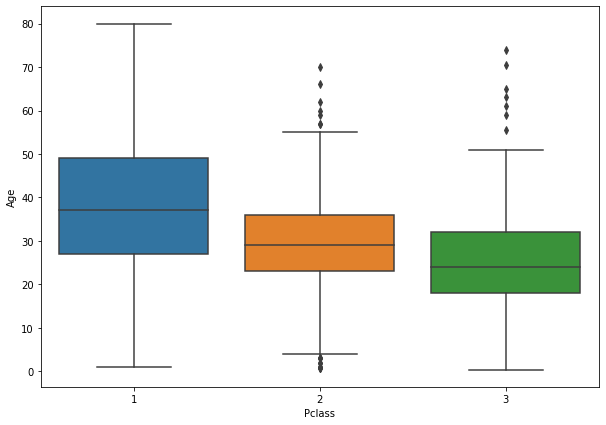

In [37]:
# lets fill age column
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y = "Age", data=train_df)
# sns.boxplot(x="Pclass", y = "Age", data=test_df)


In [38]:
train_df[train_df["Pclass"] == 1].Age.median()

37.0

In [39]:
train_df[train_df["Pclass"] == 2].Age.median()

29.0

In [40]:
train_df[train_df["Pclass"] == 3].Age.median()

24.0

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 25
    else:
        return Age


In [42]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age, axis=1)


In [43]:
train_df.Age.isnull().sum()

0

In [44]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age, axis=1)

In [45]:
test_df.Age.isnull().sum()

0

<AxesSubplot:>

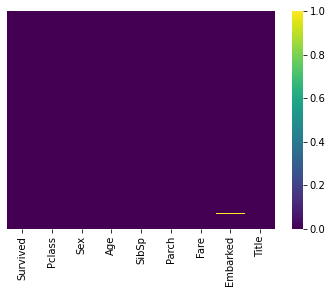

In [46]:
sns.heatmap(train_df.isnull(), yticklabels=False,  cmap='viridis')

In [47]:
train_df.Embarked.isnull().sum()

# sadece Embarked feature unda 2 null değerim var.

2

In [48]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [49]:
train_df.shape

(891, 9)

In [50]:
train_df.Embarked.isnull().sum()

2

In [51]:
train_df.dropna(subset=['Embarked'], how='all', inplace=True)

In [52]:
train_df.Embarked.isnull().sum()

0

In [53]:
train_df.shape

(889, 9)

##### Eğer Embarked feature undaki 2 missing value'u düşürmek istemez isek :  bunları en cok yolcunun bindigi liman bilgisi ile doldurabiliriz. Ancak biz datayı manipule etmektense 2 satır eksik fakat actual data ile modelimizi eğitmeyi tercih ettik.

In [54]:
# freq_port = train_df.Embarked.dropna().mode()[0]
# freq_port

In [55]:
# for dataset in combine:
#     dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
# train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

##### Altı kombinasyon için tahmini Yaş değerlerini hesaplamak için Sex (0, 1) ve Pclass (1, 2, 3) üzerinde calistirdik.

##### Age feature'unu machine learning te kullanabilmek icin AgeBand ile guncelliyoruz.

In [56]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.410138
3,"(48.168, 64.084]",0.426471
4,"(64.084, 80.0]",0.090909


##### Age kolonu ile Survived arasindaki korelasyonu gruplara bolup inceledik.

NOT: Bu gruplari farkli sayilari gruplayip modele bir katkisi olup olmadaigi denenebilir. Korelasyonlar isiginda deneme yanilma disinda pek bir kisa yolu yoktur.

In [21]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
716,717,1,1,"Endres, Miss. Caroline Louise",female,2.0,0,0,227.5250,C,Miss
637,638,0,2,"Collyer, Mr. Harvey",male,1.0,1,1,26.2500,S,Mr
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,2.0,0,0,9.5000,S,Mr
286,287,1,3,"de Mulder, Mr. Theodore",male,1.0,0,0,9.5000,S,Mr
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,7.8958,S,Mr
655,656,0,2,"Hickman, Mr. Leonard Mark",male,1.0,2,0,73.5000,S,Mr
169,170,0,3,"Ling, Mr. Lee",male,1.0,0,0,56.4958,S,Mr
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,7.7500,Q,Miss
331,332,0,1,"Partner, Mr. Austen",male,2.0,0,0,28.5000,S,Mr
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,1.0,0,0,10.5000,S,Mr


In [58]:
train_df = train_df.drop(['AgeBand'], axis=1)  # AgeBand ile işimiz kalmadı
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


###### Age feature u da guncellendi

In [59]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


##### 'SibSp'  ve 'Parch' featurelarini birlestirerek aile olarak kurtulma oranlarini inceledik. Titanic'e yalniz binenler ve genis  bir aile olarak binenler icin kurtulma sansinin dusuk olmasi goze carpan bir detay.

Bu sayede 'SibSp'  ve 'Parch' featurelari bosa dustu 1 Anlamli kolon ekleyip, 2 kullanissiz kolonu silebilecegiz.

In [60]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1  # FamilySize'ı 1 olanların (yani yalnız olanların) IsAlone verisini 1'e çevirdik

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.300935


**Yalniz olanlar modelde kullanabilecegimiz kadar buyuk bir cogunlugu olusturdugu icin onlar icinde bir feature olusturduk.**

<div class="alert alert-block alert-danger">
    
### Bakalim bu feature'i olusturmamiza kaynak olan bilgiyi kimler hatirliyor.

#### Yolcuların Yuzde % kaci ebeveynleri veya çocukları ile seyahat etmemiştir?
    
Domain Bilgisinin Onemi :))

In [61]:
# Parch, SibSp ve FamilySize feature larını IsAlone lehine düşürelim.

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


##### Gemidekilerin %75'inden fazlasi yalniz oldugu icin aile buyuklugunden daha onemli bir kriter yalniz binip binmemesidir. bu yüzden diğer 3 feagure ı drop ederek IsAlone 'u tuttuk.

##### Yolcu sinifi ve yasi arasinda bir yapay feature olusturabiliriz.  Bulgularımız neticesinde first classtakilerin ve cocuklarin daha yuksek kurtulma oranina sahip olduklarını görüyoruz.  bu ikisinin birlesiminden olusacak feature'ın modelimizin isabetliligini arttiracagini düşünüyoruz.

In [62]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


### Meraklisina; Liverpoolda uretilen Titanicin tek yolculugunda ugradigi limanlar ve rotasi
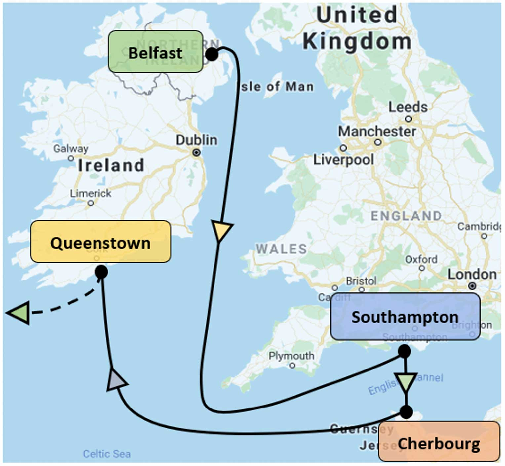

##### Yolcu aldigi limanlari ML calismamiz icin numerik veriye cevirdik.

In [63]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
for dataset in combine:
    dataset.loc[dataset['Embarked'] == "S", 'Embarked'] = 0
    dataset.loc[dataset['Embarked'] == "C", 'Embarked'] = 1 
    dataset.loc[dataset['Embarked'] == "Q", 'Embarked'] = 2    
    dataset['Embarked'] = dataset['Embarked'].astype(int)
    
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,7.2500,0,1,0,3.0
1,1,1,1,2.0,71.2833,1,3,0,2.0
2,1,3,1,1.0,7.9250,0,2,1,3.0
3,1,1,1,2.0,53.1000,0,3,0,2.0
4,0,3,0,2.0,8.0500,0,1,1,6.0


In [65]:
# for dataset in combine:
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# train_df.head()

##### Yalnızca tek bir değeri değiştirdiğimiz için, yeni bir feature oluşturmadığımızı veya eksik özelliği tahmin etmek için daha fazla korelasyon analizi yapmadığımızı unutmayalim. Tamamlama hedefimiz, model algoritmasının boş olmayan değerler üzerinde çalışması için istenen gereksinimi karşılar. O yuzden median degeri ile Fare kolonumuzu tamamliyoruz.

##### Mantiken, Para birimini temsil ettiği için ücreti iki ondalık basamağa yuvarlamak da isteyebiliriz.

In [66]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,2.0,7.8292,2,1,1,6.0
1,1,3,1,2.0,7.0000,0,3,0,6.0
2,0,2,0,3.0,9.6875,2,1,1,6.0
3,0,3,0,1.0,8.6625,0,1,1,3.0
4,1,3,1,1.0,12.2875,0,3,0,3.0


##### Fare kolonunu kendi icerisindeki dagilimina gore gruplara ayirarak kullanmaya karar verdik.

Not: Farkli sayilarda grup sayilarini deneyerek modellerin degisimini gozlemlemek ve kendinizi gelistirme calismalari yapabilirsiniz.

In [67]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [68]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,0,0,1,0,3.0
1,1,1,1,2.0,3,1,3,0,2.0
2,1,3,1,1.0,1,0,2,1,3.0
3,1,1,1,2.0,3,0,3,0,2.0
4,0,3,0,2.0,1,0,1,1,6.0


##### Gorunuse gore "Fare"deki gruplama ile beraber Machine Learning calismasi yapilabilecek bir hale gelmis gorunuyor.

In [69]:
test_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,2.0,0,2,1,1,6.0
1,1,3,1,2.0,0,0,3,0,6.0
2,0,2,0,3.0,1,2,1,1,6.0
3,0,3,0,1.0,1,0,1,1,3.0
4,1,3,1,1.0,1,0,3,0,3.0


---

---

# MACHINE LEARNING

In [70]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hüseyin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored


---

Artık bir modeli eğitmeye ve gerekli çözümü tahmin etmeye hazırız.

Aralarından seçim yapabileceğiniz cok sayida tahmine dayalı modelleme algoritması var.

Değerlendirebileceğimiz birkaç modele daraltmak için sorunun türünü ve çözüm gereksinimini anlamalıyız.
Problemimiz bir sınıflandırma ve regresyon problemidir.
Amac (Hayatta kaldı veya kalmadi) ile diğer değişkenler veya oznitelikler(Features) (Cinsiyet, Yaş, Liman...) arasındaki ilişkiyi modellemek istiyoruz.
Modelimizi belirli bir veri kümesiyle eğitirken, supervised learning kategorisinde calismamizi gerçekleştirecegiz.

Bugune kadar ogrendigimizden modellerden kullanacagiz.

- 'Logistic Regression'
- 'KNN'
- 'Support Vector Machines'
- 'Decision Tree'
- 'Random Forest'

In [72]:
# Datasetimiz literaturde onceden train ve test olarak bugune kadar cesitli calismarla gelmis.
# Karsilastirma ve egitim amacli oldugundan burada ayrima dokunmadik.
# Random state'i sabitleyip ayirmamiz ile ayni durumdur. Birileri onceden yapmis ve genel kabul gormus.

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

X_test = test_df.drop(["Survived"], axis=1)
y_test = test_df["Survived"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((889, 8), (889,), (418, 8), (418,))

In [97]:
fig = px.histogram(train_df, x="Survived")
fig.show()

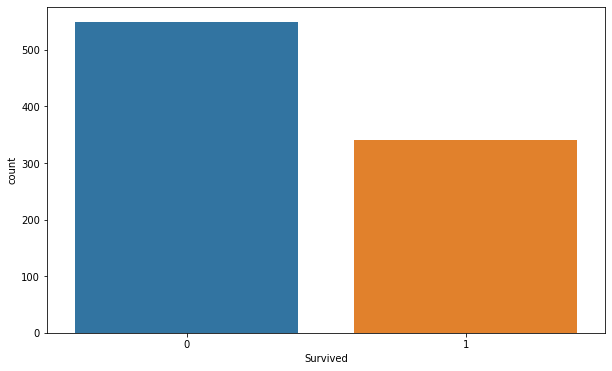

In [73]:
# Datasetimizin balance durumuna bakiyoruz.
sns.countplot(train_df.Survived);

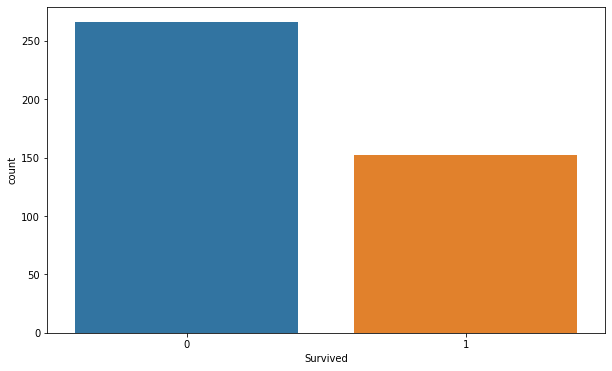

In [74]:
sns.countplot(test_df.Survived);

In [75]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2.000,0,2,1,1,6.000
1,3,1,2.000,0,0,3,0,6.000
2,2,0,3.000,1,2,1,1,6.000
3,3,0,1.000,1,0,1,1,3.000
4,3,1,1.000,1,0,3,0,3.000
...,...,...,...,...,...,...,...,...
413,3,0,1.000,1,0,1,1,3.000
414,1,1,2.000,3,1,5,1,2.000
415,3,0,2.000,0,0,1,1,6.000
416,3,0,1.000,1,0,1,1,3.000


In [76]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1.000,0,0,1,0,3.000
1,1,1,2.000,3,1,3,0,2.000
2,3,1,1.000,1,0,2,1,3.000
3,1,1,2.000,3,0,3,0,2.000
4,3,0,2.000,1,0,1,1,6.000
...,...,...,...,...,...,...,...,...
886,2,0,1.000,1,0,5,1,2.000
887,1,1,1.000,2,0,2,1,1.000
888,3,1,1.000,2,0,2,0,3.000
889,1,0,1.000,2,1,1,1,1.000


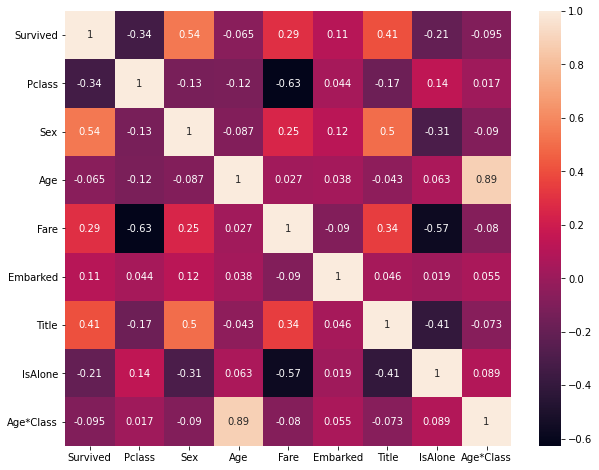

In [77]:
# diğer feature ların target a göre corr larına bakıyoruz. 

plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True);

In [78]:
!pip3 install termcolor

You should consider upgrading via the 'c:\users\hüseyin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [79]:
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

In [80]:
# feature lar arasında multicolliniarity konytrolü için aşağıdaki kodu kullanıyoruz.

df_temp = train_df.corr()
count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem")
print("\033[1mThe number of strong corelated features:\033[0m", count)

For Survived and Survived, there is NO multicollinearity problem
For Survived and Pclass, there is NO multicollinearity problem
For Survived and Sex, there is NO multicollinearity problem
For Survived and Age, there is NO multicollinearity problem
For Survived and Fare, there is NO multicollinearity problem
For Survived and Embarked, there is NO multicollinearity problem
For Survived and Title, there is NO multicollinearity problem
For Survived and IsAlone, there is NO multicollinearity problem
For Survived and Age*Class, there is NO multicollinearity problem
For Pclass and Survived, there is NO multicollinearity problem
For Pclass and Pclass, there is NO multicollinearity problem
For Pclass and Sex, there is NO multicollinearity problem
For Pclass and Age, there is NO multicollinearity problem
For Pclass and Fare, there is NO multicollinearity problem
For Pclass and Embarked, there is NO multicollinearity problem
For Pclass and Title, there is NO multicollinearity problem
For Pclass a

<AxesSubplot:>

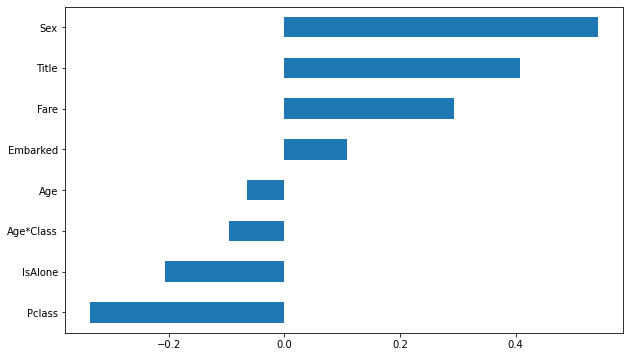

In [81]:
# feature ların survived label ı ile olan corelasyon değerleri..

train_df.corr()["Survived"].drop("Survived").sort_values().plot.barh()

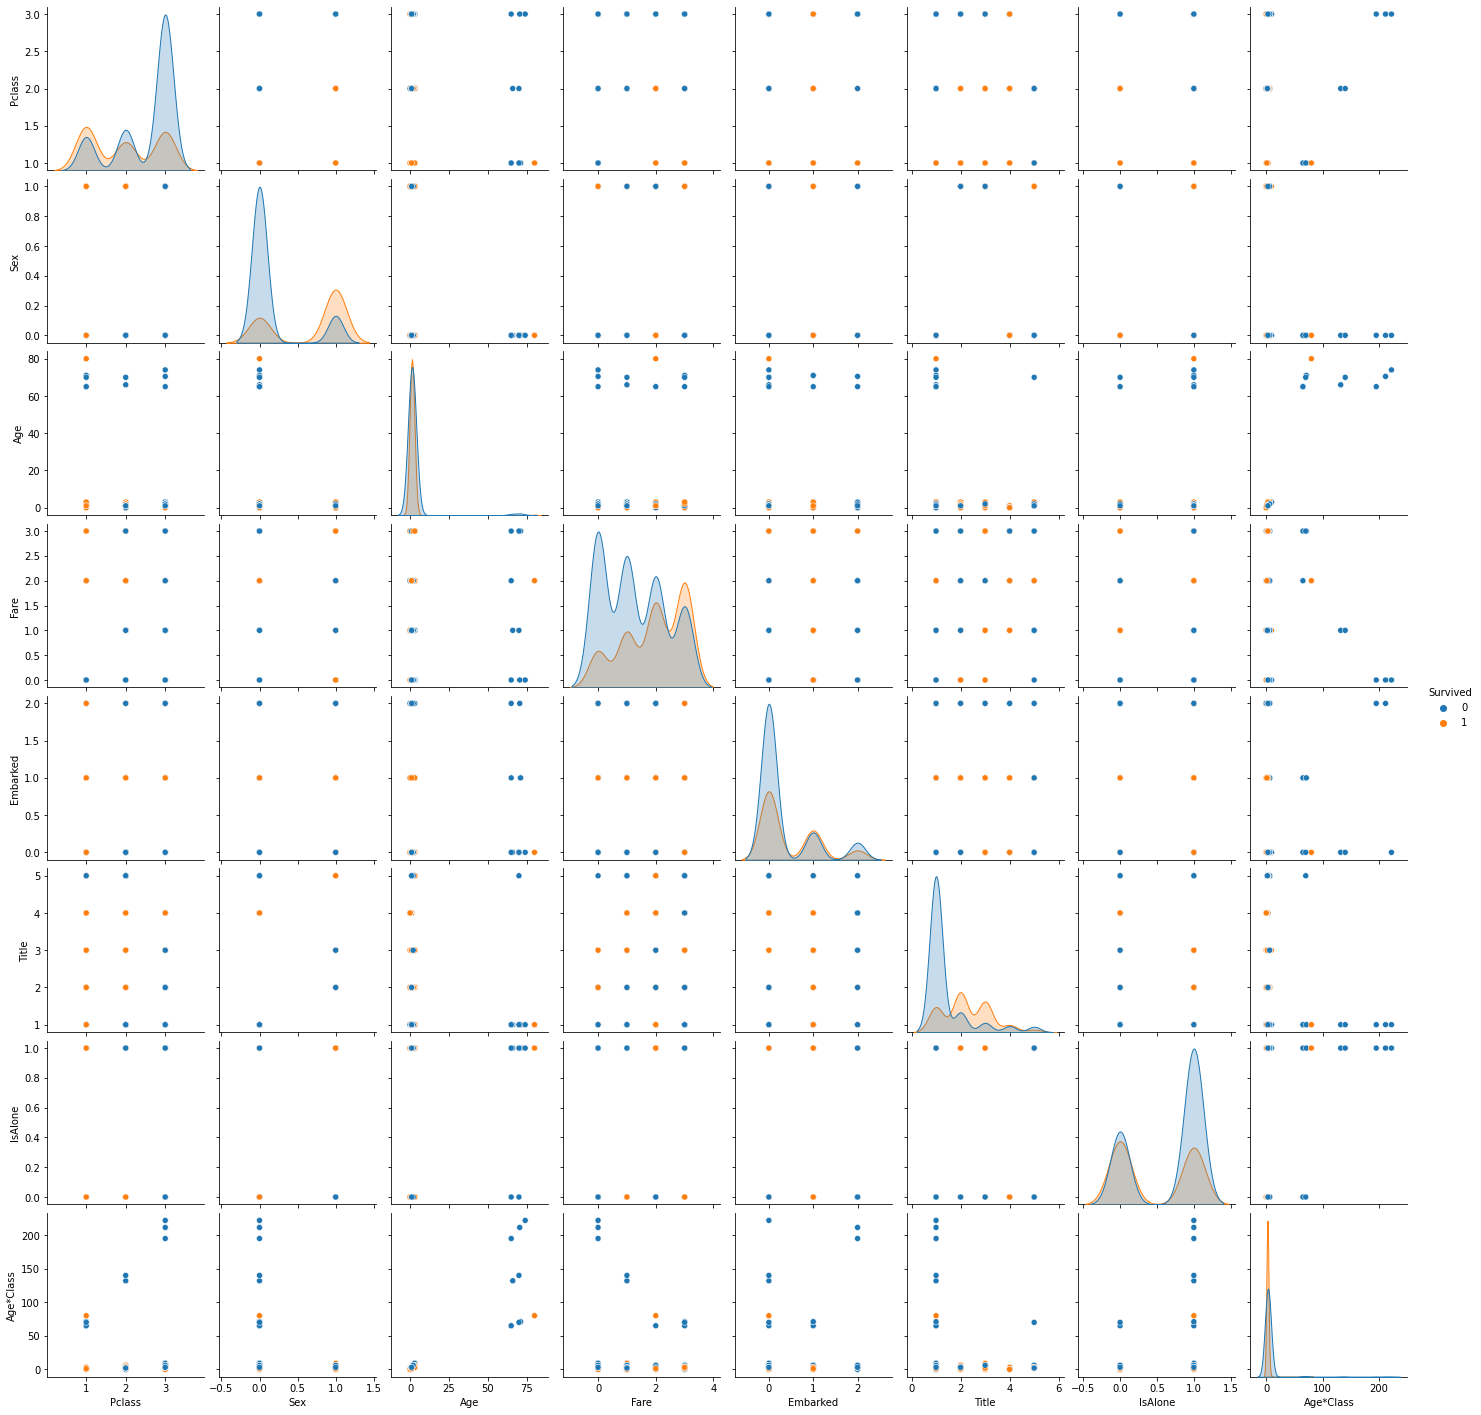

In [82]:
sns.pairplot(train_df, hue = "Survived")

In [84]:
#Metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Default değerler ile Logistic Regression uyguladigimizda

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[260   6]
 [  9 143]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.96      0.94      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [22]:
# bu fonksiyon ile hem train hem de test setlerinin 4 metriğe göre skorlarını alacağız.

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)


In [89]:
# Logistic Regression

log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred=log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)
y_pred_train = log_model.predict(X_train)

#log_acc = accuracy_score(y_test, y_pred)
#log_recall = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_pred_train, y_test, y_pred)


[[260   6]
 [  9 143]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.96      0.94      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



,train_set,test_set
Accuracy,0.803,0.964
Precision,0.770,0.960
Recall,0.691,0.941
f1,0.729,0.950


## Olceklendirip, Cross Validation uygulayarak

In [90]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.000,0,0,1,0,3.000
1,1,1,1,2.000,3,1,3,0,2.000
2,1,3,1,1.000,1,0,2,1,3.000
3,1,1,1,2.000,3,0,3,0,2.000
4,0,3,0,2.000,1,0,1,1,6.000


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)  # fit ve transformu beraber aynı kod ile yaptık.
X_test_scaled = scaler.transform(X_test)


#### Olceklendirme Sonucu

In [94]:
from sklearn.model_selection import cross_validate

In [95]:
model = LogisticRegression(class_weight = "balanced") #cross val. yaparken baştan yeni bir model objecti oluşturuyorum.

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005,0.003,0.775,0.684,0.765,0.722
2,0.005,0.003,0.764,0.651,0.824,0.727
3,0.004,0.003,0.730,0.647,0.647,0.647
4,0.004,0.002,0.764,0.633,0.912,0.747
5,0.005,0.002,0.775,0.667,0.824,0.737
6,0.006,0.003,0.775,0.706,0.706,0.706
7,0.004,0.002,0.775,0.694,0.735,0.714
8,0.006,0.002,0.775,0.719,0.676,0.697
9,0.005,0.002,0.787,0.714,0.735,0.725
10,0.006,0.002,0.761,0.659,0.794,0.720


In [96]:
df_scores.mean()[2:]

test_accuracy    0.768
test_precision   0.677
test_recall      0.762
test_f1          0.714
dtype: float64

# SUPPORT VECTOR MACHINES

SVM: classlar arasinda en iyi sekilde vektorlerle classlari ayirip siniflandirmaya calisan bir metotdur.

SVM ogrenme duskunu bir metottur, default degerleriyle genelde en iyi sonucu veremeyebilir.

***O yuzden parametre arastirmasi gereken bir metotdur, siniflari en iyi sekilde ayiran vektorleri bulmaya calisir.***

In [100]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

78.18

### SVM icin Default degerlerle Sonuclar 

[[252  14]
 [ 41 111]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       266
           1       0.89      0.73      0.80       152

    accuracy                           0.87       418
   macro avg       0.87      0.84      0.85       418
weighted avg       0.87      0.87      0.87       418

--------------------------------------------------------


,train_set,test_set
Accuracy,0.831,0.868
Precision,0.886,0.888
Recall,0.641,0.730
f1,0.744,0.801


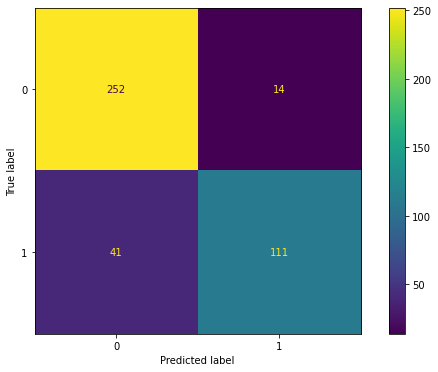

In [102]:
SVM_model = SVC() # class_weight = "balanced"  olarak sonuclari karsilastirabilirsiniz.
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
y_train_pred = SVM_model.predict(X_train)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m") # bold 
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)


##### Crossvalidate ile dogrulamamizi yapiyoruz. Sonuclarimiz Bias (Bagimli/Yapay/Manipula edilmis/Belli bir sinifa sapmis) mi yoksa degil midir?

--Curuk elma aciklamasi*--

In [104]:
model = SVC()

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
svm_scores = pd.DataFrame(scores, index = range(1, 11))
svm_scores.mean()[2:]


test_accuracy             0.819
test_precision_weighted   0.823
test_recall_weighted      0.819
test_f1_weighted          0.812
dtype: float64

## Modelling Support Vector Machine (SVM) with Best Parameters Using GridSeachCV


#### Parametre arastirmasi domain bilgisi, dataset uzerinde verilere bagimli karar verilen bir calismadir.

In [110]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

Modeli search sonuclarina bagliyoruz.

In [111]:
model = SVC(class_weight = "balanced")
SVM_grid_model = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [117]:
SVM_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=aut

[CV 1/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=100, gamma=scale, kernel=linear; total time=   0.3s
[CV 2/5] END ..............C=100, gamma=scale, kernel=linear; total time=   0.4s
[CV 3/5] END ..............C=100, gamma=scale, kernel=linear; total time=   0.9s
[CV 4/5] END ..............C=100, gamma=scale, kernel=linear; total time=   0.1s
[CV 5/5] END ..............C=100, gamma=scale, kernel=linear; total time=   0.3s
[CV 1/5] END ..................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   3.6s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   4.4s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   3.8s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   1.5s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   2.7s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   4.3s
[CV 2/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   4.4s
[CV 3/5] END ..............C

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [118]:
SVM_grid_model.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [126]:
SVM_grid_model.best_estimator_

SVC(C=10, class_weight='balanced', gamma='auto')

SVC(C=10, class_weight='balanced', gamma='auto')

In [119]:
print(colored('\033[1mBest Parameters of GridSearchCV for SVM Model:\033[0m', 'red'), colored(SVM_grid_model.best_params_, 'green'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for SVM Model:\033[0m', 'red'), colored(SVM_grid_model.best_estimator_, 'green'))


Best Parameters of GridSearchCV for SVM Model: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for SVM Model: SVC(C=10, class_weight='balanced', gamma='auto')


[[222  44]
 [ 20 132]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       266
           1       0.75      0.87      0.80       152

    accuracy                           0.85       418
   macro avg       0.83      0.85      0.84       418
weighted avg       0.86      0.85      0.85       418

--------------------------------------------------------


,train_set,test_set
Accuracy,0.844,0.847
Precision,0.775,0.750
Recall,0.832,0.868
f1,0.803,0.805


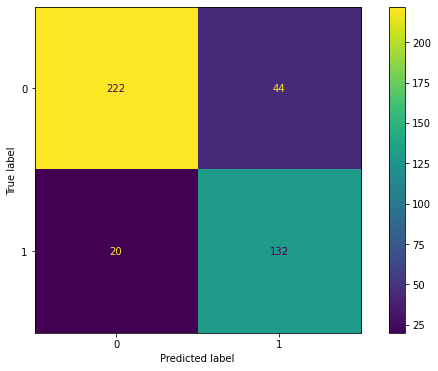

In [120]:
y_pred = SVM_grid_model.predict(X_test)

y_train_pred = SVM_grid_model.predict(X_train)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_grid_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)


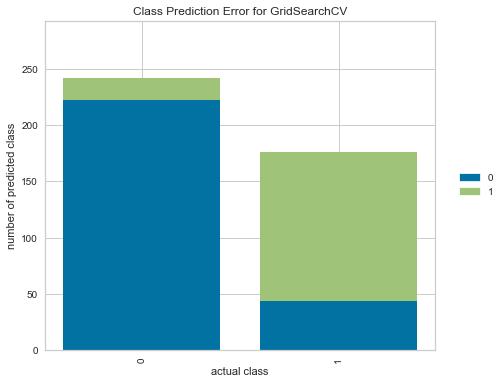

In [122]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();


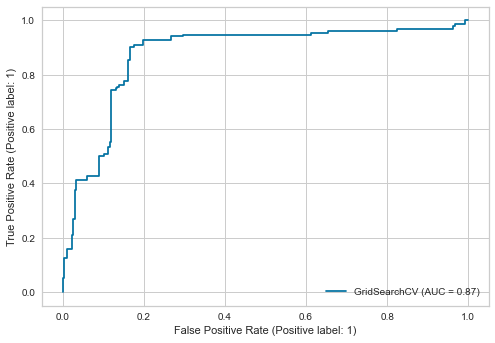

In [123]:
plot_roc_curve(SVM_grid_model, X_test, y_test);

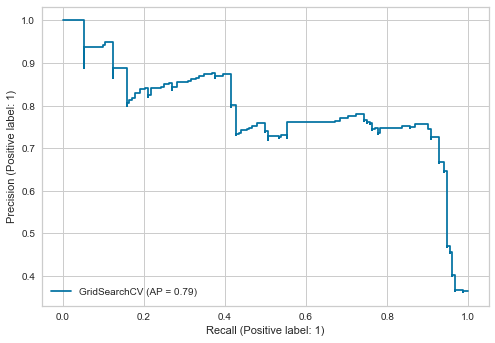

In [124]:
plot_precision_recall_curve(SVM_grid_model, X_test, y_test);


# K-Nearest Neighbours

KNN: komsu verileri ile siniflandirma yapan bir metottur.

Complexity sini arttiran tek sey komsu sayisidir.

### Default Degerler ile K-NN

[[224  42]
 [ 35 117]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       266
           1       0.74      0.77      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.81      0.80       418
weighted avg       0.82      0.82      0.82       418

--------------------------------------------------------


,train_set,test_set
Accuracy,0.618,0.816
Precision,0.000,0.736
Recall,0.000,0.770
f1,0.000,0.752


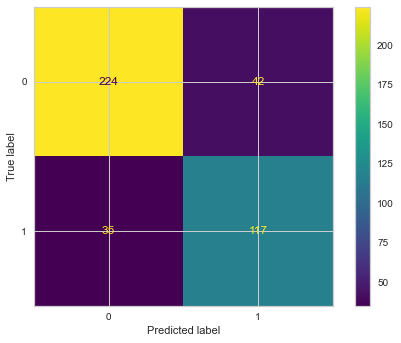

In [129]:

KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)

y_train_pred = SVM_model.predict(X_train)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [134]:
model = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.006,0.652,0.548,0.500,0.523
2,0.003,0.005,0.798,0.767,0.676,0.719
3,0.003,0.006,0.730,0.679,0.559,0.613
4,0.003,0.006,0.809,0.730,0.794,0.761
5,0.003,0.005,0.831,0.828,0.706,0.762
6,0.003,0.007,0.831,0.806,0.735,0.769
7,0.002,0.005,0.820,0.846,0.647,0.733
8,0.003,0.006,0.798,0.786,0.647,0.710
9,0.002,0.006,0.865,0.844,0.794,0.818
10,0.003,0.005,0.818,0.800,0.706,0.750


In [136]:
df_scores.mean()[2:]

test_accuracy    0.795
test_precision   0.763
test_recall      0.676
test_f1          0.716
dtype: float64

##### En iyi komsu sayisini arayacagiz

In [137]:
KNN_grid = KNeighborsClassifier()

In [138]:
k_values= range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [139]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')

In [140]:
KNN_grid_model.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [142]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'red'), colored(KNN_grid_model.best_params_, 'green'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'red'), colored(KNN_grid_model.best_estimator_, 'green'))


Best Parameters of GridSearchCV for RF Model: {'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: KNeighborsClassifier(n_neighbors=14)


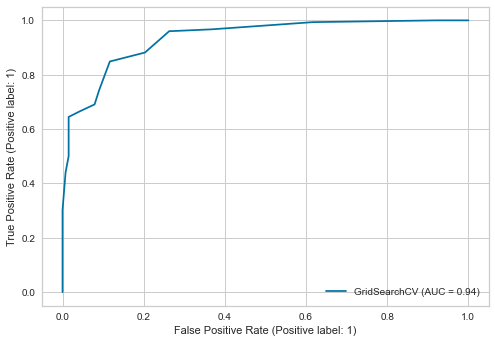

In [143]:
plot_roc_curve(KNN_grid_model, X_test, y_test);

### Recall imbalanced durumunda daha onemli, bir gosterim ile kontrol ediyoruz

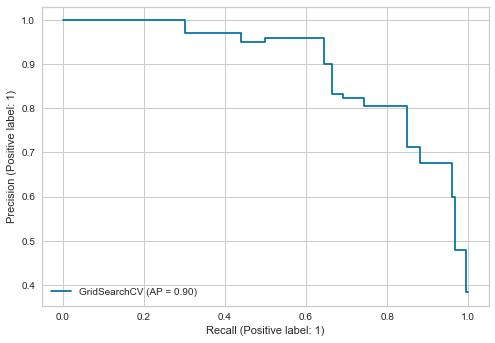

In [144]:
plot_precision_recall_curve(KNN_grid_model, X_test, y_test);

##### Imbalanced miktari gayet az miktarda oldugunu goruyoruz

# Decision Tree

Decision Tree featurelari en anlamli sekilde ayirmak uzere en onemli gordugu featuredan baslayarak dallanarak ilerler.

Her bir dal demek bir karar demektir.

Decision Dal sayisi belli basli bir kac parametreye baglidir. Datasete uygun olmasina dikkat ederek ve overfitting dikkat ederek parametreler bulunur.

[[236  30]
 [ 35 117]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       266
           1       0.80      0.77      0.78       152

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.84      0.84      0.84       418

--------------------------------------------------------


,train_set,test_set
Accuracy,0.867,0.844
Precision,0.878,0.796
Recall,0.759,0.770
f1,0.814,0.783


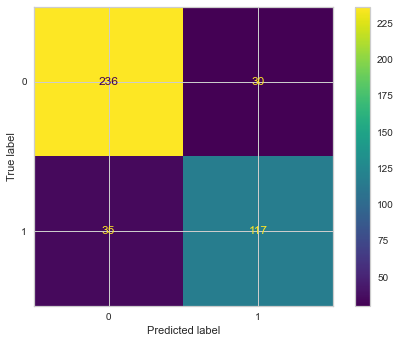

In [146]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

y_train_pred = DT_model.predict(X_train)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)


In [149]:
model = DecisionTreeClassifier(max_depth=None, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.004,0.002,0.719,0.645,0.588,0.615
2,0.002,0.003,0.820,0.821,0.676,0.742
3,0.002,0.003,0.719,0.680,0.500,0.576
4,0.002,0.003,0.809,0.707,0.853,0.773
5,0.002,0.003,0.854,0.862,0.735,0.794
6,0.002,0.003,0.764,0.810,0.500,0.618
7,0.003,0.003,0.831,0.852,0.676,0.754
8,0.003,0.003,0.809,0.793,0.676,0.730
9,0.003,0.003,0.831,0.788,0.765,0.776
10,0.003,0.004,0.818,0.821,0.676,0.742


In [172]:
DT_model.feature_importances_

array([0.17300309, 0.01175193, 0.0487749 , 0.08691556, 0.03009397,
       0.57004692, 0.03694415, 0.04246949])

In [174]:
DT_feature_imp = pd.DataFrame(index = X_train.columns, data = DT_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
DT_feature_imp

,Feature Importance
Title,0.570
Pclass,0.173
Fare,0.087
Age,0.049
Age*Class,0.042
IsAlone,0.037
Embarked,0.030
Sex,0.012


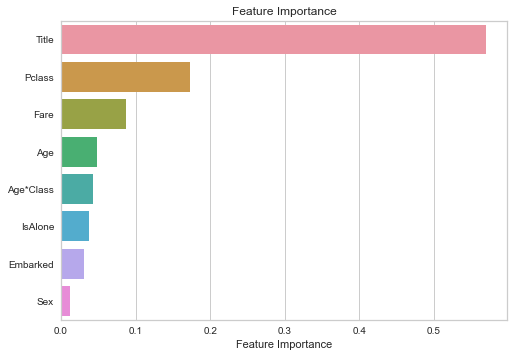

In [175]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [150]:
df_scores.mean()[2:]

test_accuracy    0.798
test_precision   0.778
test_recall      0.665
test_f1          0.712
dtype: float64

### Grid Search ile en iyi olusturabilecegimiz Decision Tree parametrelerini bulma

In [153]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [154]:
model = DecisionTreeClassifier(random_state=42)

DT_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [162]:
print(colored('\033[1mBest Parameters of GridSearchCV for DT Model:\033[0m', 'blue'), colored(DT_grid_model.best_params_, 'green'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for DT Model:\033[0m', 'blue'), colored(DT_grid_model.best_estimator_, 'green'))

Best Parameters of GridSearchCV for DT Model: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'best'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for DT Model: DecisionTreeClassifier(max_features=3, min_samples_leaf=2, min_samples_split=9,
                       random_state=42)


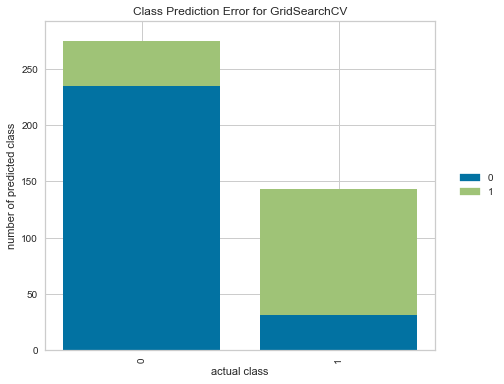

In [169]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();


# Random Forest

Random Forest, adindanda anlasilacagi uzere icinde karar agaclari barindiran (Decision Tree) bir ormana benzemektedir.

Overfitting'e karsi robust bir yapisi vardir. Bunu icindeki randomize yapisi saglar.

Bundada en iyi sonucu bulmak belli basli parametreleri optimize ederiz.

[[223  43]
 [ 30 122]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       266
           1       0.74      0.80      0.77       152

    accuracy                           0.83       418
   macro avg       0.81      0.82      0.81       418
weighted avg       0.83      0.83      0.83       418

--------------------------------------------------------


,train_set,test_set
Accuracy,0.960,0.825
Precision,1.000,0.739
Recall,0.891,0.803
f1,0.942,0.770


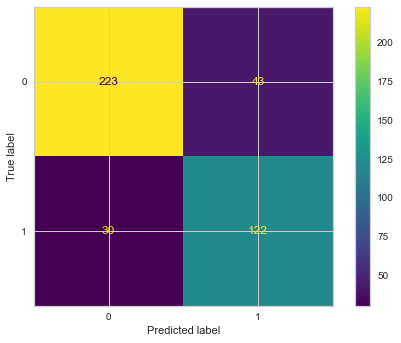

In [176]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

y_train = RF_model.predict(X_train)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)


In [177]:
model = RandomForestClassifier(max_depth=None, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
1,0.108,0.010,0.978,0.971,0.982,0.976
2,0.107,0.009,0.989,0.991,0.985,0.988
3,0.104,0.011,0.966,0.958,0.973,0.964
4,0.110,0.010,0.978,0.971,0.982,0.976
5,0.103,0.008,0.989,0.985,0.991,0.988
6,0.108,0.008,0.989,0.991,0.985,0.988
7,0.108,0.009,0.978,0.976,0.976,0.976
8,0.118,0.010,0.933,0.941,0.915,0.926
9,0.115,0.009,0.966,0.961,0.967,0.964
10,0.116,0.012,1.000,1.000,1.000,1.000


In [178]:
df_scores.mean()[2:]

test_accuracy          0.976
test_precision_macro   0.975
test_recall_macro      0.976
test_f1_macro          0.975
dtype: float64

### En iyi parametreleri bulmak icin GridSearch Yapacagiz

In [179]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [180]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
RF_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [181]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'green'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'green'))


Best Parameters of GridSearchCV for RF Model: {'max_depth': 9, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=4,
                       n_estimators=50, random_state=42)


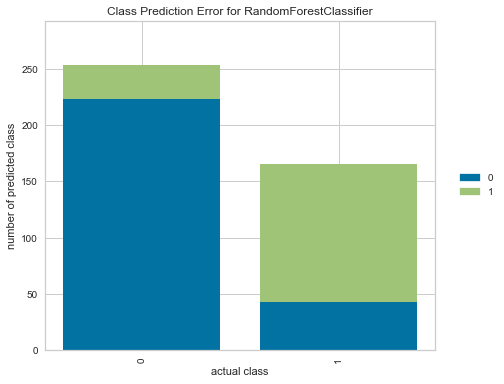

In [183]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();


In [184]:
RF_model.feature_importances_

array([0.14631844, 0.23163364, 0.05253444, 0.12109001, 0.07063384,
       0.25250824, 0.03703619, 0.08824521])

In [188]:
RF_feature_imp = pd.DataFrame(index = X_train.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp


,Feature Importance
Title,0.253
Sex,0.232
Pclass,0.146
Fare,0.121
Age*Class,0.088
Embarked,0.071
Age,0.053
IsAlone,0.037


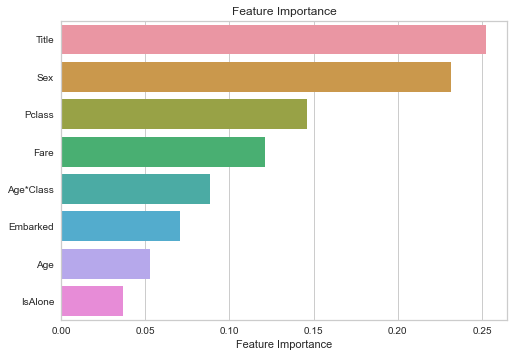

In [189]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()


# Yorumlarimiz

***

# Elimizde basarili modellerimiz var.

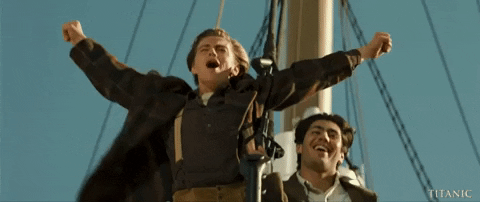


---


## Yuksek basari ile sag kalanlari tahmin edebilen bir modelimiz var. 
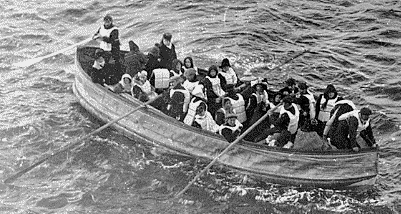 <p>

## Gecen haftaki calismada denemelerden sonra bile model basari istenilen gibi olmamisti. Titanic datasetinde ozellikle decision tree bazli algoritmalarla iyi sonuclar almis olduk.